In [1]:
cd ../sentiment-clf/

/Users/nguyen/projects/flask-rest-setup/sentiment-clf


In [2]:
from model import NLPModel
import pandas as pd
from sklearn.model_selection import train_test_split

## Create the model object
The NLP model object has the following attributes:
        
        self.clf = MultinomialNB()
        # self.vectorizer = TfidfVectorizer(tokenizer=spacy_tok)
        self.vectorizer = TfidfVectorizer()

In [3]:
model = NLPModel()

## Get the data

In [4]:
with open('lib/data/train.tsv') as f:
    data = pd.read_csv(f, sep='\t')

## Use only the 1 star and 5 star reviews
For this example, we want to only predict positive or negative sentiment using the extreme cases.

In [5]:
pos_neg = data[(data['Sentiment'] == 0) | (data['Sentiment'] == 4)]

## Relabel as 0 for negative and 1 for positive

In [6]:
pos_neg['Binary'] = pos_neg.apply(
    lambda x: 0 if x['Sentiment'] == 0 else 1, axis=1)

/Users/nguyen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Fit a vectorizer to the vocabulary in the dataset

In [7]:
model.vectorizer_fit(pos_neg.loc[:, 'Phrase'])

## Transform the text in the dataset to its vectorized representation

In [8]:
X = model.vectorizer_transform(pos_neg.loc[:, 'Phrase'])

## Separate the target from the data

In [9]:
y = pos_neg.loc[:, 'Binary']

## Cross Validation!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train the model

In [11]:
model.train(X_train, y_train)

In [12]:
from util import plot_roc

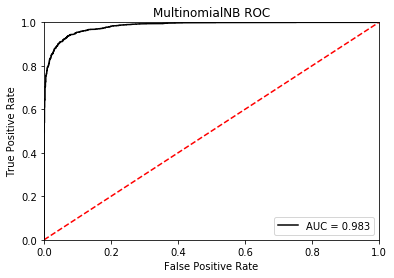

In [13]:
model.plot_roc(X_test, y_test)